## Question 5.1 from Network Science book by Barabasi
### 5.1. Generating Barabási-Albert Networks
With the help of a computer, generate a network with $N = 10^4$ nodes
using the Barabási-Albert model with m = 4. Use as initial condition a fully
connected network with m = 4 nodes. <br>
(a) Measure the degree distribution at intermediate steps, namely
when the network has $10^2$, $10^3$
 and $10^4$ nodes. <br>
(b) Compare the distributions at these intermediate steps by plotting them together and fitting each to a power-law with degree
exponent γ. Do the distributions "converge"? <br>
(c) Plot together the cumulative degree distributions at intermediate steps. <br>
(d) Measure the average clustering coefficient in function of N. <br>
(e) Following Figure 5.6a, measure the degree dynamics of one of the
initial nodes and of the nodes added to the network at time t =
100, t = 1,000 and t = 5,000.

---
### We use the methods from the Graphs.jl package

In [ ]:
using Graphs
using StatsBase
using Plots

# conditions
m = 4
N = 100
InitialNodes = 6

a) Degree Distribution

In [141]:
# Create Initial Graph
g = barabasi_albert(N, InitialNodes, m)
IntermediateSteps = [100, 1000, 10000]
DegreePerStep = []
# Measuring the Degrees
for i in IntermediateSteps
    g = barabasi_albert!(g, i, m)
    Degree = degree_histogram(g)
    push!(DegreePerStep, Degree)
end
DegreesBinnedX = []
DegreesBinnedY = []
DegreesBinnedXLinear = []
DegreesBinnedYLinear = []
for i in 1:3
    X = sort(collect(keys(DegreePerStep[i])))
    Y = []
    for j in X
        push!(Y, get(DegreePerStep[i], j, m))
    end
    push!(DegreesBinnedX, log.(X))
    push!(DegreesBinnedY, log.(Y))
    push!(DegreesBinnedXLinear, X)
    push!(DegreesBinnedYLinear, Y)
end

b) Plotting the degree distribution and fitting lines

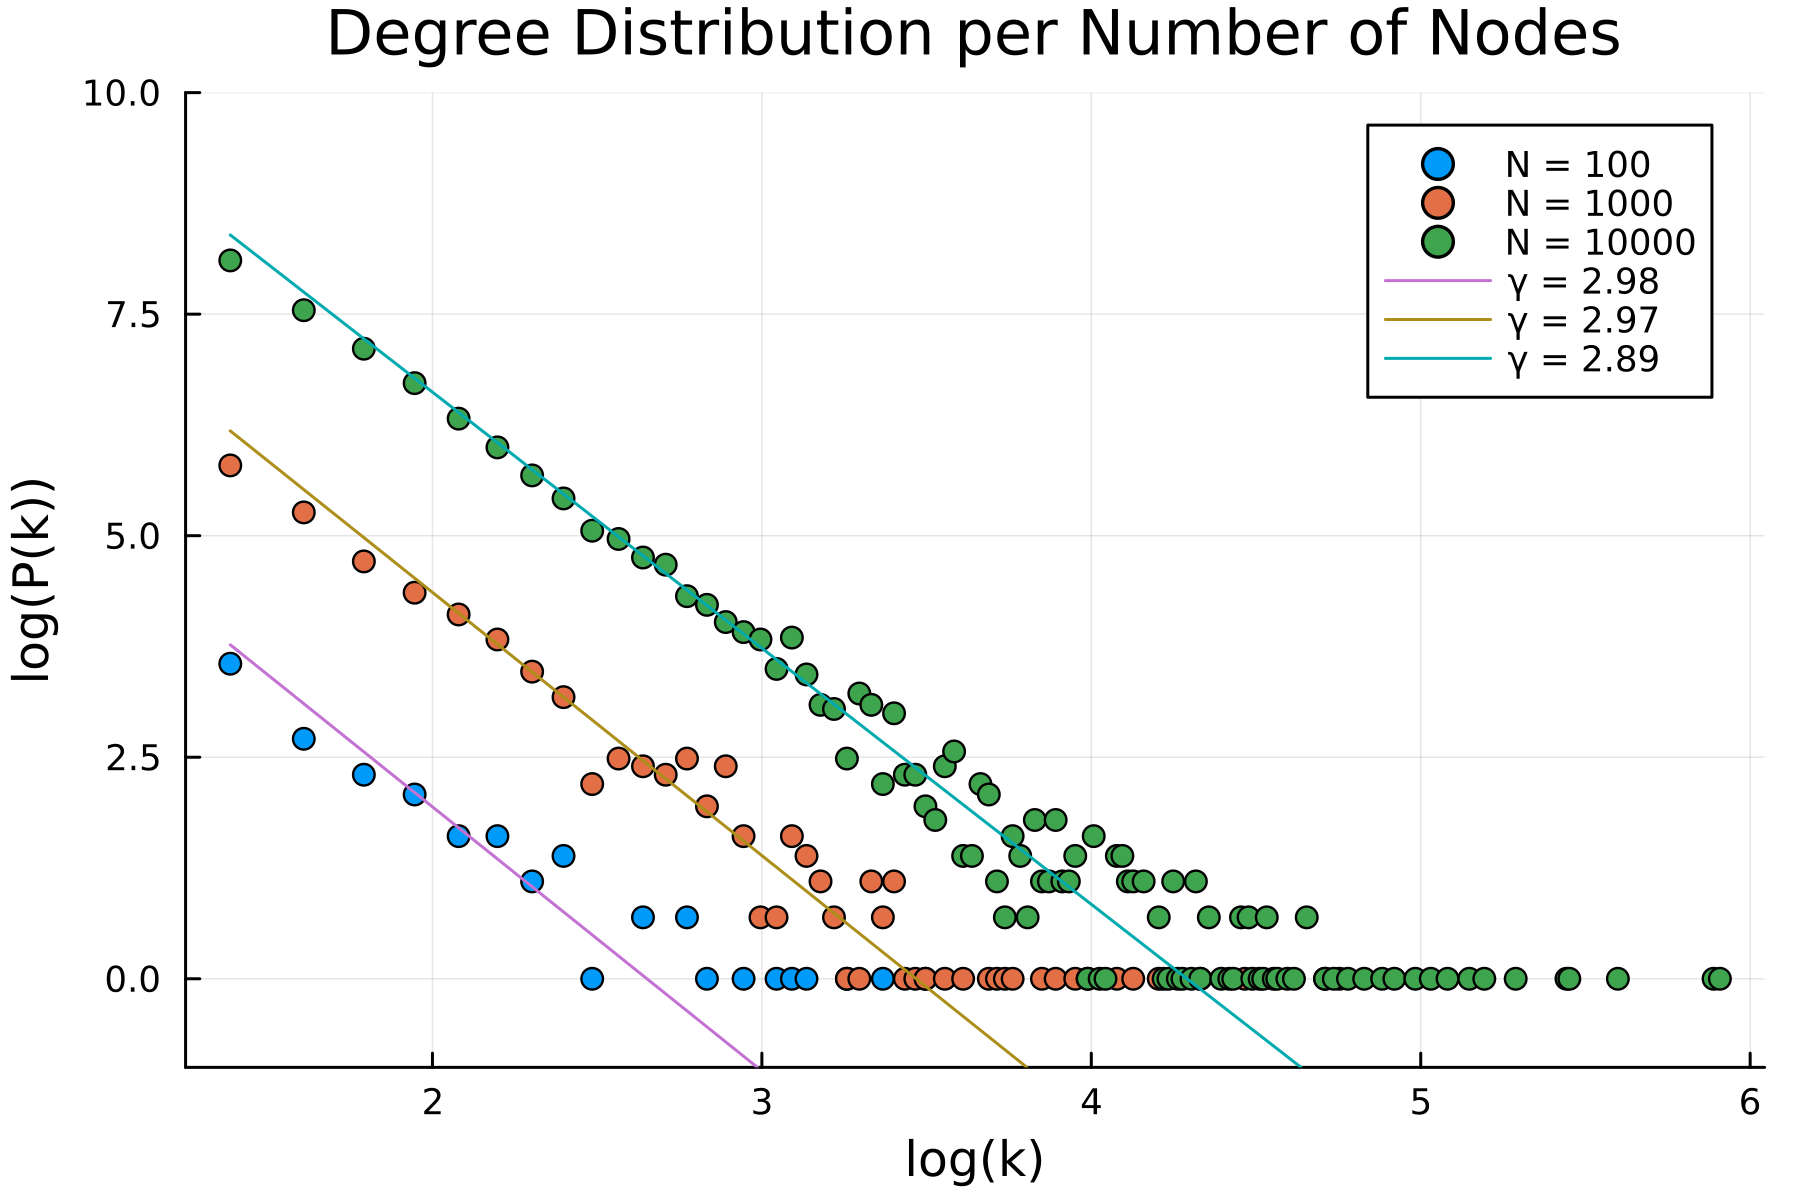

In [142]:
scatter(DegreesBinnedX[1], DegreesBinnedY[1], title = "Degree Distribution per Number of Nodes", label = "N = 100", xlabel = "log(k)", ylabel = "log(P(k))", dpi = 300, ylims = (-1,10))
scatter!(DegreesBinnedX[2], DegreesBinnedY[2], label = "N = 1000")
scatter!(DegreesBinnedX[3], DegreesBinnedY[3], label = "N = 10000")
f(x) = 7.9 - 2.98 * x
f2(x) = 10.3 - 2.97 * x
f3(x) = 12.4 - 2.89 * x
plot!(f, label = "γ = 2.98")
plot!(f2, label = "γ = 2.97")
plot!(f3, label = "γ = 2.89")


The slope seems to decrease so the functions converge.

c) Cumulative Distribution


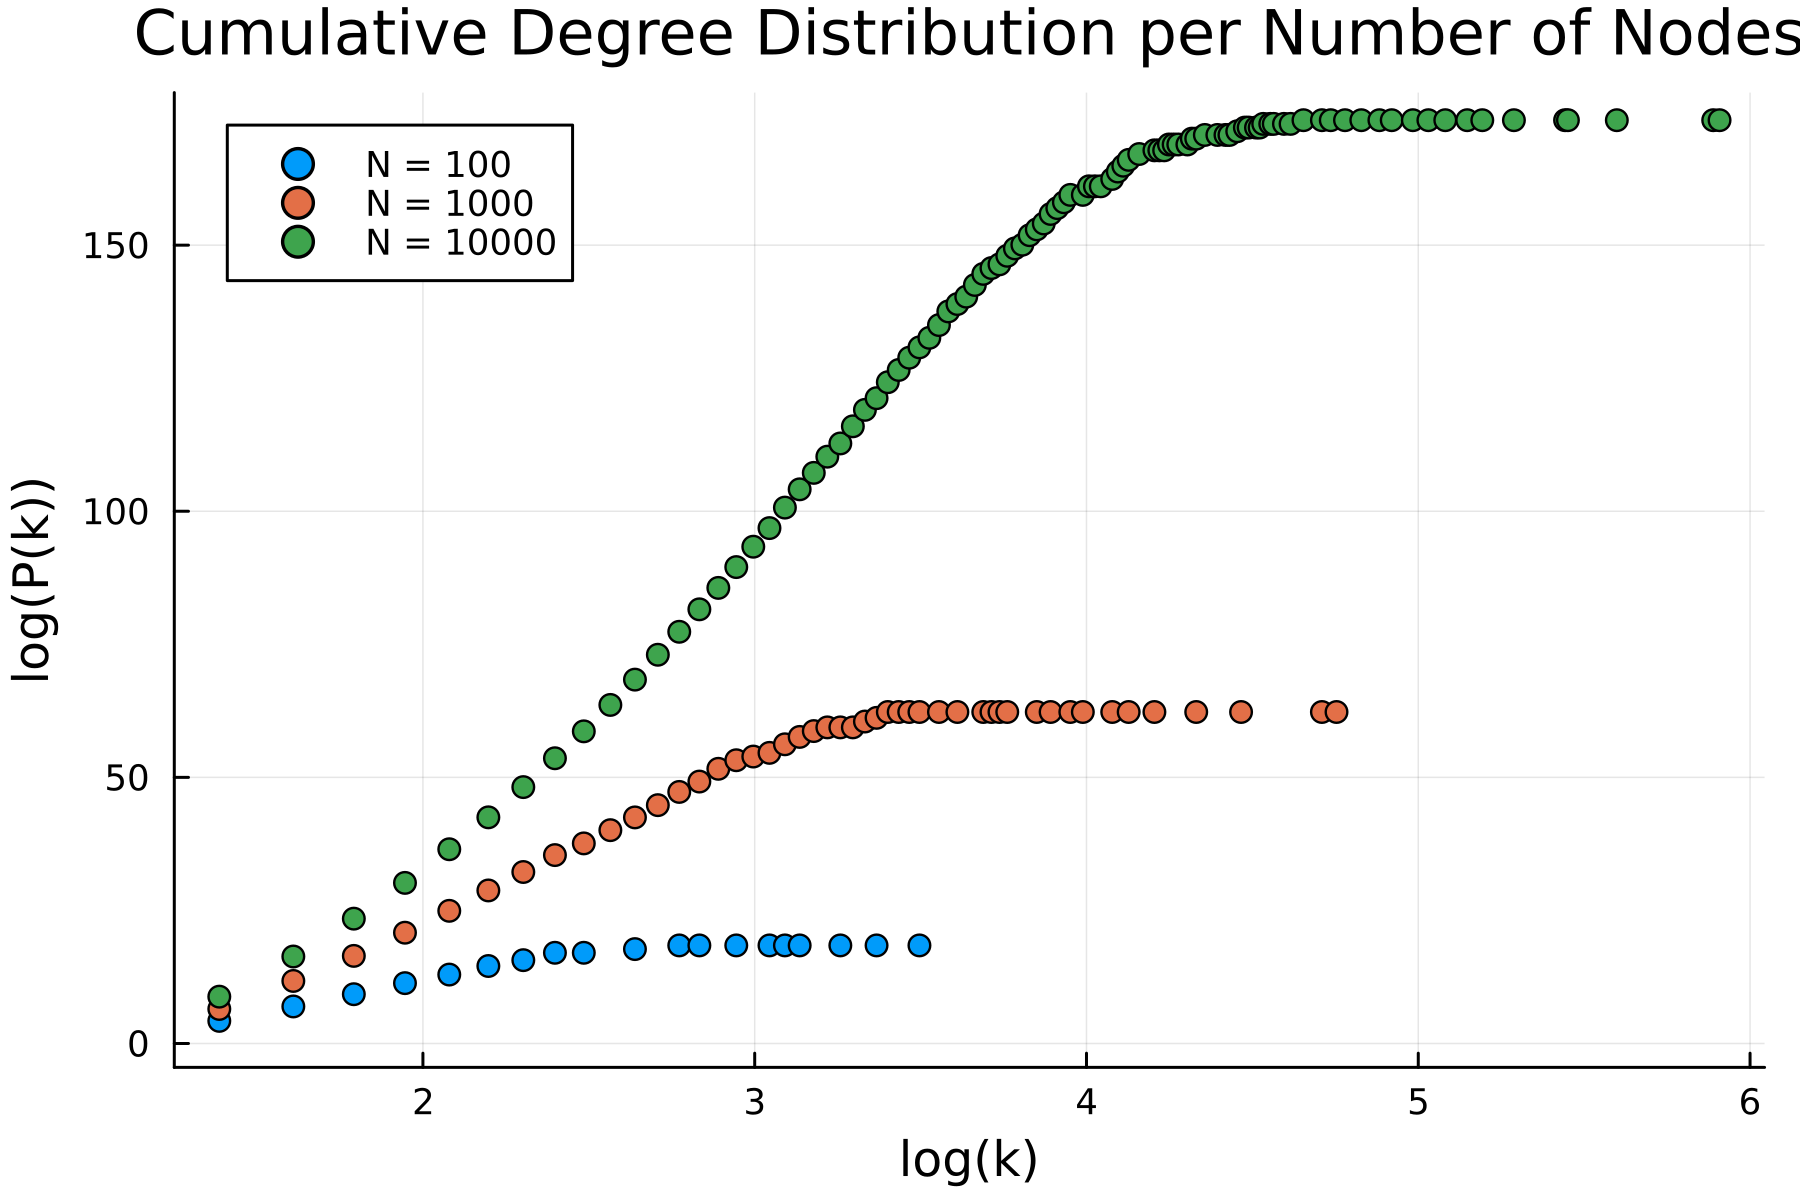

In [143]:
CumSums = []
for i in 1:3
    push!(CumSums, cumsum(DegreesBinnedY[i]))
end
scatter(DegreesBinnedX[1], CumSums[1], title = "Cumulative Degree Distribution per Number of Nodes", label = "N = 100", xlabel = "log(k)", ylabel = "log(P(k))", dpi = 300)
scatter!(DegreesBinnedX[2], CumSums[2], label = "N = 1000")
scatter!(DegreesBinnedX[3], CumSums[3], label = "N = 10000")

d) Average Clustering Coefficient

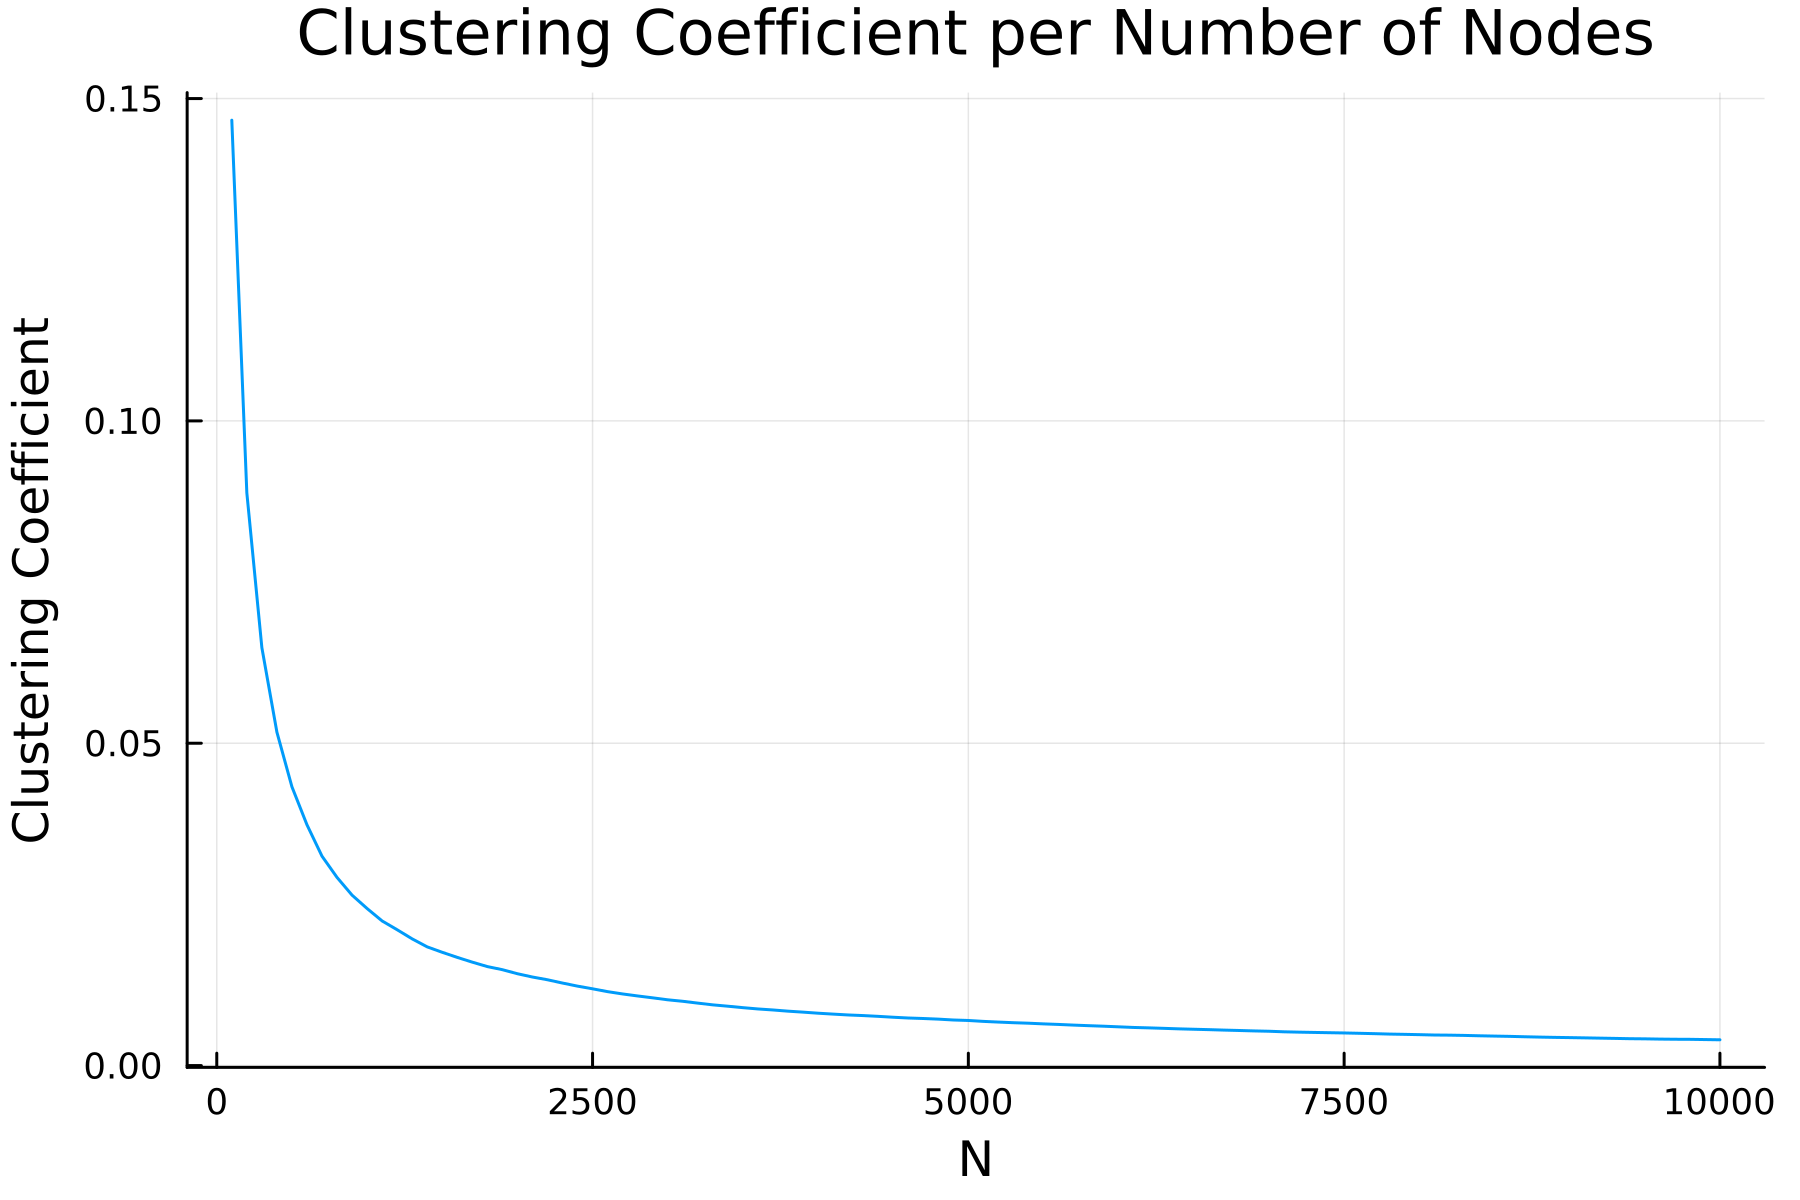

In [144]:
g = barabasi_albert(N, InitialNodes, m)
CCs = []
Steps = LinRange(100, 10000, 100)
StepsInt = [floor(Int,x) for x in Steps]
for i in StepsInt
    g = barabasi_albert!(g, i, m)
    Clustering_Coefficient = global_clustering_coefficient(g)
    push!(CCs, Clustering_Coefficient)
end
plot(StepsInt, CCs, title = "Clustering Coefficient per Number of Nodes", legend = false, xlabel = "N", ylabel = "Clustering Coefficient", dpi = 300)

d) Degree Dynamics

In [145]:
g = barabasi_albert(N, InitialNodes, m)
t = 99
T1 = []
T2 = []
T3 = []
Degree100 = []
Degree1000 = []
Degree5000 = []
for i in 101:1000
    g = barabasi_albert!(g, i, m)
    t += 1
    push!(Degree100, degree(g)[100])
    push!(T1, t)
end
for i in 1001:5000
    g = barabasi_albert!(g, i, m)
    t += 1
    push!(Degree100, degree(g)[100])
    push!(Degree1000, degree(g)[1000])
    push!(T1, t)
    push!(T2, t)
end
for i in 5001:10000
    g = barabasi_albert!(g, i, m)
    t += 1
    push!(Degree100, degree(g)[100])
    push!(Degree1000, degree(g)[1000])
    push!(Degree5000, degree(g)[5000])
    push!(T1, t)
    push!(T2, t)
    push!(T3, t)
end


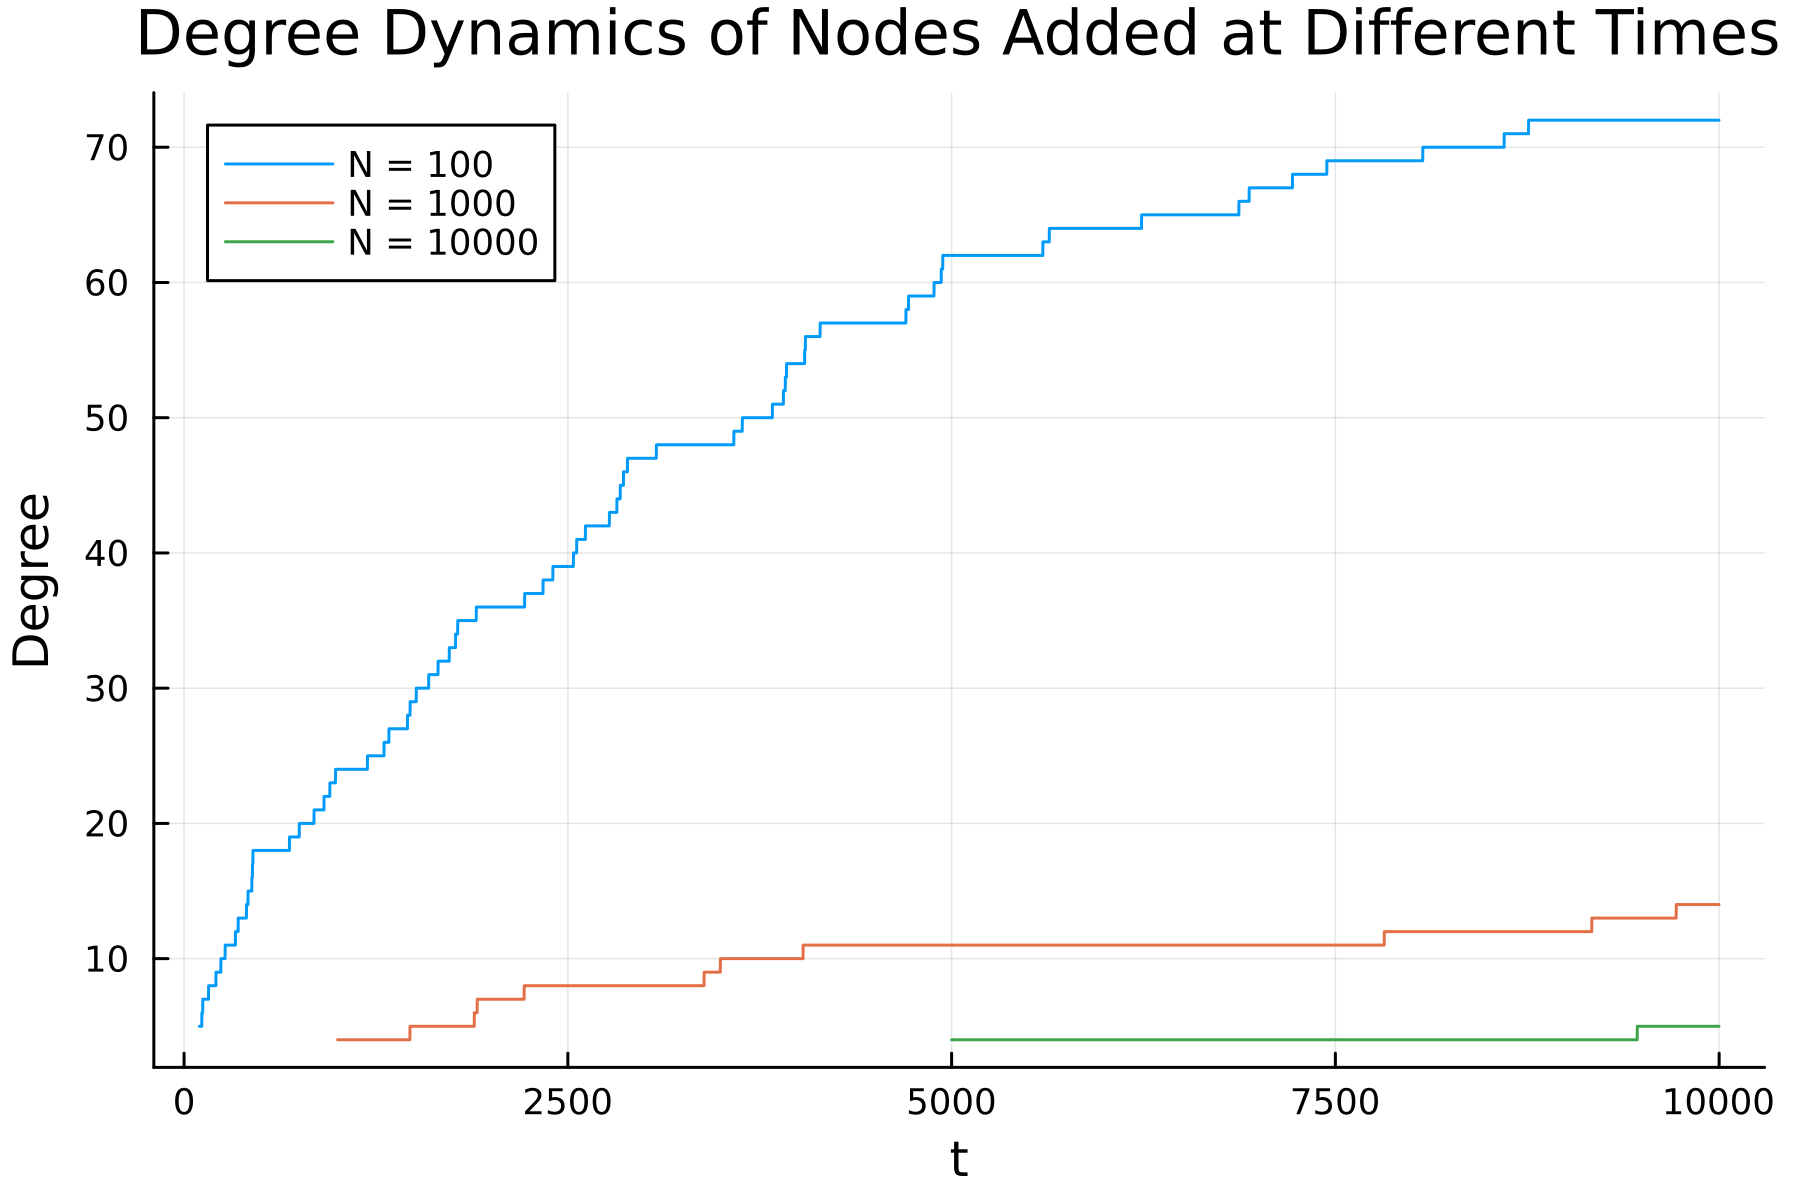

In [146]:
plot(T1, Degree100, title = "Degree Dynamics of Nodes Added at Different Times", label = "N = 100", xlabel = "t", ylabel = "Degree", dpi = 300)
plot!(T2, Degree1000, label = "N = 1000")
plot!(T3, Degree5000, label = "N = 10000")

The degrees that are added first increase their degrees significantly while the nodes added later barely gain degrees.